In [64]:
import pandas as pd
import numpy as np
%matplotlib inline
#Primero veo que datos tengo respecto de estos centros
#Los datos fueron sacados de https://drive.google.com/file/d/0Bx63od1LTzcVelZhd2Q1OW1JLUE/view
centros_de_educacion =  pd.read_csv("/home/santiago/Desktop/Academico/UBA/Introduccion a los Sistemas Inteligentes(75.50)/TP Final/TP/Git/TPSistemasInteligentes/establecimientos-educativos.csv")

data = centros_de_educacion[['lat','long','barrio','nivel']]

In [65]:
#Nos quedamos con jardines, primarios, secundarios y universidades
jardines = data[data['nivel'].str.contains("Inicial")]
primarios = data[data['nivel'].str.contains("Prima")]
secundarios = data[data['nivel'].str.contains("Secund")]
universidades = data[data['nivel'].str.contains("Univ")]

escuelas = pd.concat([jardines,primarios,secundarios,universidades])
escuelas.drop_duplicates(inplace = True)

In [66]:
#Renombro un campo
escuelas['lon'] = escuelas['long']
escuelas = escuelas[['lat','lon','barrio','nivel']]
escuelas.head()

,lat,lon,barrio,nivel
2,-34.565676,-58.470192,BELGRANO,Inicial Común
3,-34.584847,-58.400357,RECOLETA,Inicial Común
4,-34.603379,-58.426547,ALMAGRO,Inicial Común
5,-34.620816,-58.467954,FLORES,Inicial Común
6,-34.616163,-58.479206,VILLA SANTA RITA,Inicial Común


In [67]:

#Datos procesados
filteredData = pd.read_csv('dataFiltrada/datosCapital.csv',low_memory = False)


#Tomo los datos que me interesan: estado, barrio, superficie, precio por m2, latitud y longitud)
propiedades = filteredData[['property_type','barrio','rooms','price','lat', 'lon']]


#Elimino NAs
propiedades.dropna(inplace=True)

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [68]:
#Defino una funcion que calcula la distancia entre dos puntos
import math
def dist(lat1,lon1,lat2,lon2):
    dLat = math.radians(lat2-lat1)
    dLon = math.radians(lon2-lon1)

    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)

    a = math.sin(dLat/2) * math.sin(dLat/2) + math.sin(dLon/2) * math.sin(dLon/2) * math.cos(lat1) * math.cos(lat2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return c * 6371 * 1000
    #return np.abs((lat1 - lat2) + (lon1 - lon2))

def dist2(lat,lon):
    distancias = escuelas.apply(lambda row: dist(lat, lon, row['lat'], row['lon']), axis=1)
    return distancias.min()

In [86]:
propiedades['distancia_minima_escuela (m)'] = propiedades.apply(lambda row: dist2(row['lat'], 
                                                                                  row['lon']), axis=1)
propiedades.head()

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,property_type,barrio,rooms,price,lat,lon,distancia_minima_escuela (m)
0,PH,Flores,3.0,125000.0,-34.655647,-58.496525,185.098765
1,PH,Nuñez,4.0,375000.0,-34.542750,-58.460145,313.053012
2,PH,Villa del Parque,5.0,190000.0,-34.599720,-58.499126,280.175814
3,Casa,Barracas,6.0,185000.0,-34.635021,-58.389091,48.182273
4,Departamento,Once,2.0,69000.0,-34.606777,-58.410057,192.701313


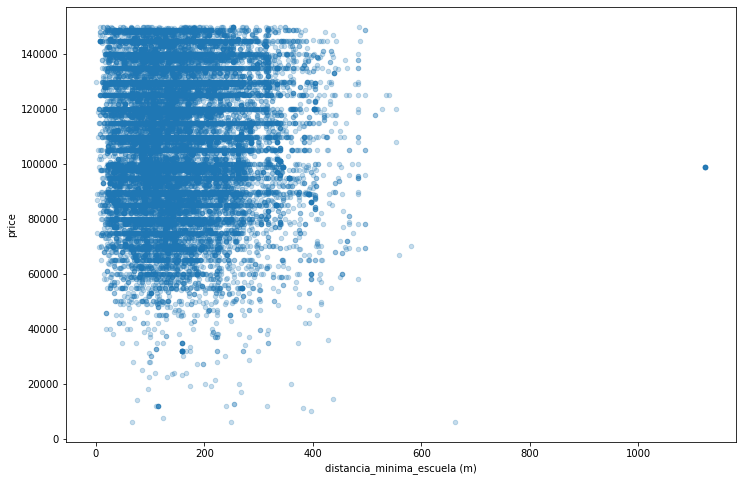

In [87]:
%matplotlib inline
df = propiedades[propiedades['distancia_minima_escuela (m)']< 2000]
df = df[df['price']< 150000]
df.plot.scatter('distancia_minima_escuela (m)', 'price',alpha=0.25, figsize=(12,8))

In [89]:
propiedades.sample(200)

,property_type,barrio,rooms,price,lat,lon,distancia_minima_escuela (m)
68997,Departamento,Palermo,2.0,348000.0,-34.573463,-58.436361,36.389336
37526,Departamento,Belgrano,2.0,89000.0,-34.561456,-58.463178,113.129198
36949,Departamento,Balvanera,4.0,279000.0,-34.605134,-58.407907,153.389648
25844,Departamento,Once,5.0,170000.0,-34.614646,-58.406460,98.048892
67378,Departamento,Monte Castro,1.0,98000.0,-34.627051,-58.508369,134.863988
72201,Departamento,Centro / Microcentro,6.0,170000.0,-34.600251,-58.378954,17.488173
29359,Departamento,Palermo,5.0,990000.0,-34.568574,-58.442320,73.442918
9303,Departamento,Palermo,2.0,159500.0,-34.571179,-58.431863,90.760437
1999,Departamento,Palermo,3.0,620000.0,-34.578083,-58.405342,25.669093
67950,Departamento,Villa Crespo,2.0,169000.0,-34.597917,-58.422463,118.051107


In [90]:
filteredData['distancia_minima_escuela (m)'] = propiedades[['distancia_minima_escuela (m)']]
filteredData

,Unnamed: 0,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,distancia_minima_escuela (m)
0,325,2019-07-18,9999-12-31,-34.655647,-58.496525,Flores,3.0,2.0,1.0,125.0,90.0,125000.0,Venta PH en Flores Capital Federal Directorio ...,"PH en Venta, Departamento tipo casa de 3 ambie...",PH,Venta,185.098765
1,330,2019-07-18,2019-08-17,-34.542750,-58.460145,Nuñez,4.0,3.0,3.0,293.0,221.0,375000.0,270mt Mar Canasvieiras-FLORIANÓPOLIS-BRAZIL-Fi...,PENTHOUSE 3DORMITORIOS SIENDO 2SUITES a 270mt...,PH,Venta,313.053012
2,337,2019-07-18,9999-12-31,-34.599720,-58.499126,Villa del Parque,5.0,4.0,1.0,95.0,NaN,190000.0,Venta PH en Villa del Parque Capital Federal J...,"PH en Venta, P.H 95m2 todo en planta baja, co...",PH,Venta,280.175814
3,413,2019-07-18,9999-12-31,-34.635021,-58.389091,Barracas,6.0,5.0,1.0,160.0,140.0,185000.0,Venta Casa en Barracas Capital Federal ANCHORI...,"Casa en Venta, CASA 6 AMBIENTES A METROS DEL H...",Casa,Venta,48.182273
4,663,2019-07-18,9999-12-31,-34.606777,-58.410057,Once,2.0,1.0,1.0,36.0,36.0,69000.0,Venta Departamento en Once Capital Federal JEA...,"Departamento en Venta, VENTA 2 AMBIENTES .JEA...",Departamento,Venta,192.701313
5,672,2019-07-18,2019-07-25,-34.565168,-58.434490,Palermo,4.0,3.0,4.0,215.0,205.0,1420000.0,QUARTIER LIBERTADOR,Av. Del Libertador al 4800 - Quartier Libertad...,Departamento,Venta,85.714293
6,673,2019-07-18,2019-09-11,-34.594234,-58.421823,Palermo,3.0,2.0,2.0,94.0,80.0,379000.0,Se vende departamento 3 Ambientes C/ cochera e...,Nuevo y Excelente departamento 3 ambientes de ...,Departamento,Venta,122.808690
7,817,2019-07-18,9999-12-31,NaN,NaN,Belgrano,3.0,NaN,1.0,62.0,62.0,175000.0,Departamento 62m² 3 ambientes con Plantas en S...,Excelente departamento lleno de luz y sol en B...,Departamento,Venta,NaN
8,818,2019-07-18,9999-12-31,NaN,NaN,Belgrano,2.0,NaN,1.0,56.0,49.0,192639.0,"Departamento 56m² 2 ambientes en Roosevelt, Av...","Dos ambientes a estrenar en edificio CHAGALL ,...",Departamento,Venta,NaN
9,821,2019-07-18,2019-07-31,-34.631462,-58.482067,Floresta,2.0,1.0,1.0,35.0,35.0,82000.0,Venta Departamento en Floresta Capital Federal...,"Departamento en Venta, Departamento 2 ambiente...",Departamento,Venta,101.442945


In [91]:
df.to_csv(r'/home/santiago/Desktop/Academico/UBA/Introduccion a los Sistemas Inteligentes(75.50)/TP Final/TP/Git/TPSistemasInteligentes/File Name.csv')
